<a href="https://colab.research.google.com/github/aagalperin/data_science_na_pratica/blob/master/airbnb_overview_montreal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#An overview of Montreal spaces available on Airbnb

Created in 2008 with an unique approach towards lodging, [Airbnb](https://www.airbnb.com) is a marketplace that uses the "sharing economy" to conect hosts offering a place to stay and guests that need somewhere to crash. Now Airbnb is one of the world's largest marketplaces offering over 7 million accommodations across 220+ coutries and regions. Almong all the cities, Montreal counts with this tool to help hospitality entrepreneurs monetyze their spaces. 

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

##Objective:

In this exercise I will be colecting data from a summarized database provided by Airbnb in the website [Inside Airbnb](http://insideairbnb.com/index.html) and making a simple analysis about the units available in Montreal. 

<br>

---
*This is an exercise from Data Science course chatpiter #1 made by __Adriana 
Galperin__.*


## Data Gathering

A project created by Murray Coxthe allows us to manipulate part of Airbnb data to get some insights in each city and neighborhood about room/house renting that was made through Airbnb platform.

For the prurpose of this first exercise, the simplified database provided into the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html) was used:

* `	listings.csv` : Summary information and metrics for listings in Montreal (good for visualisations).

The datasets were scraped on April 20th, 2020

In [0]:
# Install libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# Load listings.csv into our DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/qc/montreal/2020-04-20/visualisations/listings.csv")

## Data Analysis

The main objective in this section is make sure we understand all the data available and discover if the database needs any further treatment such as for absent values, outliers or data formats.

**Data Dictionary**

Variable | Definition
---|---
id| property unique indentifier
name|	property name
host_id|	host unique identifier
host_name|	host name
neighbourhood_group|
neighbourhood| neighborhood name
latitude|	geographic coordinates about the property latitude
longitude| geographic coordinates about the property longitude
room_type|	categorize the property as *entire home/apt*, *private room*, *shared room* or *hotel room* 
price| one night renting price
minimum_nights|	minimal nights  of renting required by the owner
number_of_reviews|	how many reviews the property has
last_review|	last review date
reviews_per_month|	avarage of reviews made in one month
calculated_host_listings_count|	how many propertys the same host has
availability_365| days of occupancy of the property in one year 


In [169]:
# Show first 5 rows of my dataframe
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2078,Central comfy close to Metro Laurie,2277,Nelia,NaN,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room,39,2,245,2018-09-23,2.33,1,109
1,2843,Fabulous downtown/airport room,2319,Gail,NaN,Le Sud-Ouest,45.48496,-73.58001,Private room,29,7,143,2019-12-30,1.08,6,201
2,14584,"Spread Out in 1,200 Square Feet of Luxury in t...",57358,Verona,NaN,Le Plateau-Mont-Royal,45.54135,-73.57814,Entire home/apt,175,3,177,2020-03-22,1.64,1,354
3,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,80,2,326,2020-03-20,2.72,2,323
4,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,145,3,66,2020-02-17,0.66,2,324


###Q1. How this data set is structured?
As the main objective here is doing an exploratory reserch, it is really important that we understand (1)how many data entries this data set has, (2) how many variables it provides and (3) what are those variable types.

Having  those informations are extremely important so we can make some decisions of how to proceed our analysis, such as: do I need to change any of these variables type?

In [170]:
## How many data entries it has?
print("Data entry:\t {}".format(df.shape[0]))

## How many variables it has?
print("Variables:\t {}\n".format(df.shape[1]))

## Data type for each variable:
display(df.dtypes)

Data entry:	 19731
Variables:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###Q2. Does the dataset has missing data?

Null data or NaN (not a number) can influence our analysis. So it is really important to find out if we should treat any case.

In [171]:
# Percentage of null data the data has in each column and ording those columns
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.202879
last_review                       0.202879
name                              0.000912
host_name                         0.000051
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

__Q2. insights:__

* `last_review` brings us the date from the last evaluating, and is an irrelevant for this analysis.

* When `reviews_per_month` is not disponible it means that this property haven't recieved any reviews yet, so its value should be eguals to zero.

* In the other side, the column `neighbourhood_group` won't give us any insight as it has any valid entry.

In [172]:
# Replacing invalid values for zero into 'reviews_per_month' column
df.fillna({'reviews_per_month':0}, inplace=True)

# Validating the changes
df.reviews_per_month.isnull().sum()

0

###Q3. How the information is distributed ?

Creating an histogram will help us to determine if using mesures as the mean (or average) can give us a good approximation for the center of the data and can point us the existence of outliers.

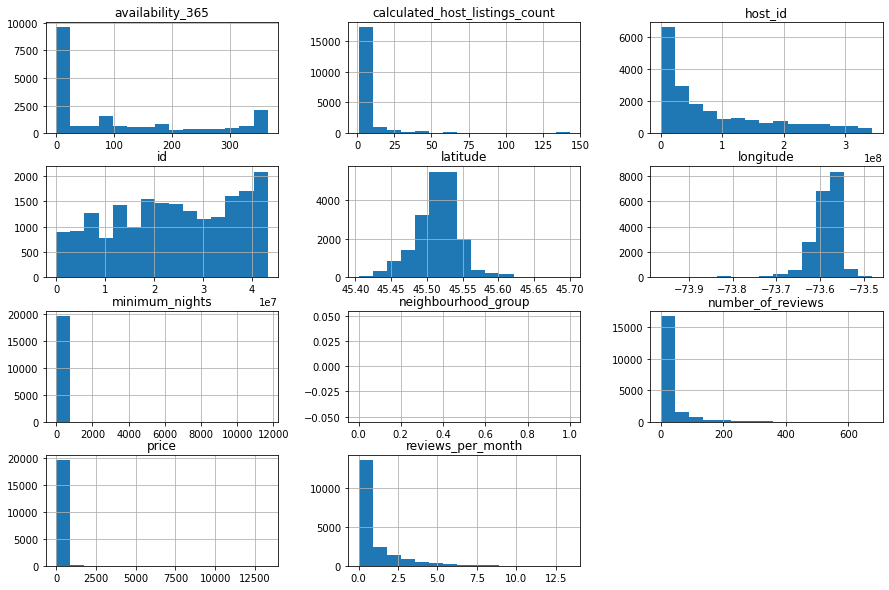

In [173]:
df.hist(bins=15, figsize=(15,10));

**Q3 Insights**

* Looking to `calculated_host_listing_count` and `host_id` it is possible to question if people are using Airbnb as it should (renting their own house our room space) or if they are using the site to make profit.

* There are two variables that we should take a closer look into the possibility of having outliers: `minimum_nights` and `price`.

###Q4. Are there outliers?

As we saw in the Q3 some data as `price` and  `minimum_nights` maybe could have some outliers. So in these step I'm going to evaluate those variables that may contain noise inside them.




In [174]:
# Confirm if there is any information that could mislead the analysis
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,19731.000000,19731.000000
mean,115.074603,10.714764
std,232.801705,89.794089
min,10.000000,1.000000
25%,49.000000,1.000000
50%,78.000000,2.000000
75%,120.000000,5.000000
max,13294.000000,11684.000000


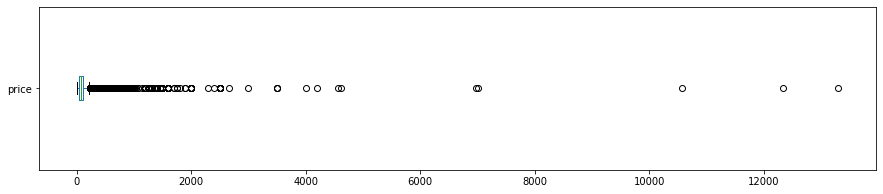

In [175]:
# Creating a box-plot graph for price
df.price.plot(kind='box', vert=False, figsize=(15,3));

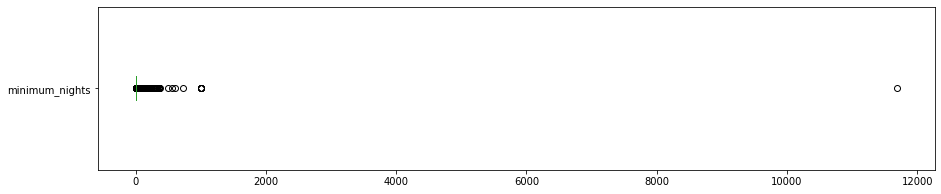

In [176]:
# Creating a box-plot graph for minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));

#### **Price analysis**

As it was visible, the price for one nigth could reach $13,294 dollars, that is a really unlikely value for one stand. As well, the large range of 3rd quartile could be signing to a problem.

**Price Outlier calculated**

1. IIQ = Q3 - Q1
    * IQQ = 120 - 49 = 71
1. Outlier > Q3 + 1.5 - IQQ
    * Outliers > 50.5

**Price Outlier used**

As we can see in the data below, I couldn't use the usual outlier formula because if I did so, I would be ignoring a great part of the top prices (those that appear with more frequency). So I used the biggest value in the ranking with more than 200 manifestations.

In [177]:
# Validating the outlier value
top_prices=df.price.value_counts().head(40)
top_prices

99     810
80     643
90     613
49     606
70     539
35     536
45     475
50     475
55     446
120    425
39     413
76     411
25     396
85     389
41     370
150    355
60     344
100    310
29     309
61     304
200    304
75     282
30     279
64     278
125    259
149    236
249    232
69     229
20     212
130    208
65     177
94     166
95     162
78     155
59     152
111    141
32     140
139    126
300    125
199    122
Name: price, dtype: int64

In [178]:
# Show the representativeness of price over 50.5 dollars per nigth:
print("price: 50.5") 
print("Values over $50.5/night: {}".format(len(df[df.price > 50.5])))
print("Representativeness: {:.2f}\n".format((len(df[df.price > 50.5]) / df.shape[0])*100))

# Show the representativeness of price over 250 dollars per nigth:
print("price: 250") 
print("Values over $150/night: {}".format(len(df[df.price > 250])))
print("Representativeness: {:.2f}\n".format((len(df[df.price > 250]) / df.shape[0])*100))

price: 50.5
Values over $50.5/night: 14018
Representativeness: 71.05

price: 250
Values over $150/night: 1124
Representativeness: 5.70



As imagined, it is not possible to use the calculated value of \$50.50. If we did so we would be excluding 71% of all the values.
By the other side if we use the value of \$249 as determined by the top prices we would exclude 1,124 values (5.7% of the database) what is more reasonable.  

#### **Minimun nights analysis**

As it was visible, the minimum nigths constraint could reach 11.684 days, that is a really unlikely value for a rent. As well, the standard deviation of 89 days say that something ia not rigth.

**Price Outlier calculated**

1. IIQ = Q3 - Q1
    * IQQ = 5 - 1 = 4
1. Outlier > Q3 + 1.5 - IQQ
    * Outliers > 2.5

**Price Outlier used**

As we can see in the data below, I couldn't use the usual outlier formula because if I did so, I would be ignoring a great part of the the appartments. So I used the biggest value in the ranking with more than 200 manifestations.





In [179]:
# Validating the outlier value
top_min_nigths=df.minimum_nights.value_counts().head(15)
top_min_nigths

1     6415
2     5150
3     2028
30     880
7      836
5      756
31     642
4      640
32     552
14     243
6      234
10     177
28     143
90     133
15     125
Name: minimum_nights, dtype: int64

In [180]:
# Show the representativeness of minimum_nights over 3 days
print("minimum_nights: 3") 
print("Values over 3 nights: {}".format(len(df[df.minimum_nights > 3])))
print("Representativeness: {:.2f}\n".format((len(df[df.minimum_nights > 3]) / df.shape[0])*100))

# Show the representativeness of minimum_nights over 32 days
print("minimum_nights: 32") 
print("Values over 32 nights: {}".format(len(df[df.minimum_nights >= 32])))
print("Representativeness: {:.2f}\n".format((len(df[df.minimum_nights >= 32]) / df.shape[0])*100))

minimum_nights: 3
Values over 3 nights: 6138
Representativeness: 31.11

minimum_nights: 32
Values over 32 nights: 1108
Representativeness: 5.62



As imagined, it is not possible to use the value calculated as the outlier. To help into the decision it was ranked the most commun quantity of nigths needed and it was found the value of 32 nigths. The properties that asks for bigger periods represents 5.62% of the data (better than the 31% of the calculated value) 

####Taking out the outliers



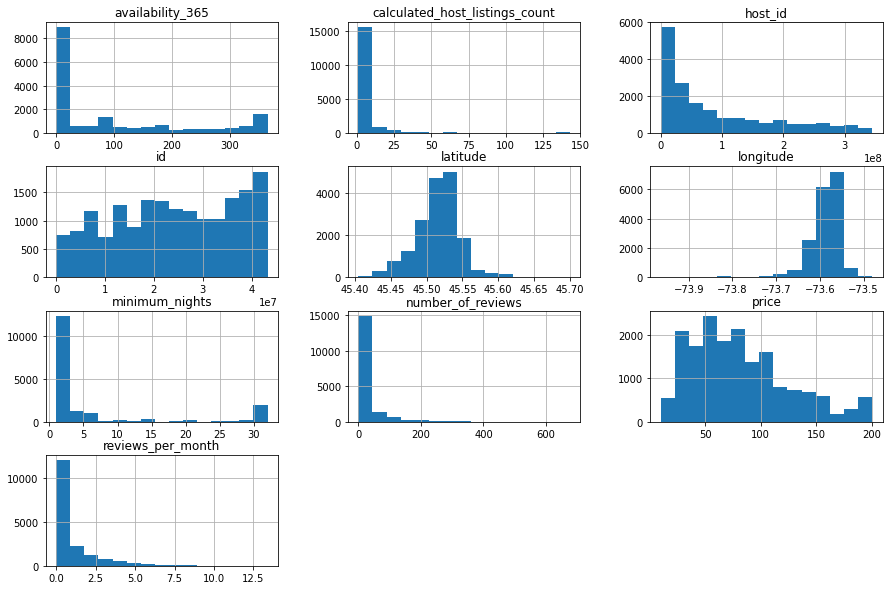

In [181]:
# Remove outliers:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 200].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 32].index, axis=0, inplace=True)

# Remove `neighbourhood_group` that is empty
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Remove data that is irrelevant to this analysis:
df_clean.drop('host_name', axis=1, inplace=True)
df_clean.drop('last_review', axis=1, inplace=True)

# Histogram
df_clean.hist( bins=15, figsize=(15,10));

###Q5. Is Airbnb well served into Montreal?
 
As its main objective is develop a circular economy and connect people, it would be intersting if its well served all over the city, specially with shared options (shared room or private room inside a shared house). Maybe there is  room for growth into this canadian city.

In [184]:
# How many entries of each room type the database has
df_clean.room_type.value_counts()


Entire home/apt    12041
Private room        5312
Shared room          157
Hotel room            51
Name: room_type, dtype: int64

####Type of room
We could think that as Airbnb main proposal is to share experiences, that the private room or the shared room should be more interesting than the hotel and the entire home/apt.

In [197]:
# analysing the price that each type of room usualy has
df_clean.groupby(['room_type']).price.mean()

room_type
Entire home/apt     96.080973
Hotel room         113.607843
Private room        48.047252
Shared room         40.369427
Name: price, dtype: float64

Text(0.5, 1.0, 'Density and distribution of prices for each room type')

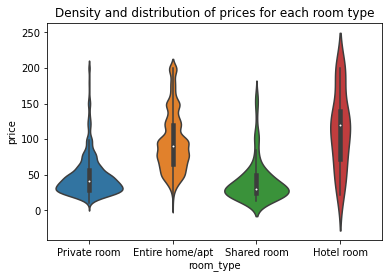

In [189]:
# taking a look into the distribution of prices in each type of room
condition=df_clean[df_clean.price < 200]
viz_prices_room_type=sns.violinplot(data=condition, x='room_type', y='price')
viz_prices_room_type.set_title('Density and distribution of prices for each room type')

In [205]:
# Taking a look into the occupancy of each type of room
df_clean.groupby(['room_type']).availability_365.mean() / 365 * 100

room_type
Entire home/apt    27.429866
Hotel room         55.084609
Private room       24.906957
Shared room        35.229038
Name: availability_365, dtype: float64

In [214]:
# criteria for renting houses
df_clean.groupby(['room_type']).minimum_nights.mean()

room_type
Entire home/apt    7.041110
Hotel room         1.666667
Private room       4.592244
Shared room        3.694268
Name: minimum_nights, dtype: float64

**Q5. Insights**

* The most part of the ads are from entire appartments/houses, witch is not the mais focus of Airbnb.And even if it is more expensive than the shared options (room or house) and it demands the higher quantity of nights to allow an reservation, it is the second type of room with the best occupancy.

* To hotels, the platfom does't help a lot. Whit the smallest requirements of time spent in the place, and the worst price, hotels have 55% of the year with vancant rooms if the platform was their only way of reaching clients and booking for them. Maybe that is why there are soo few hotels into the site.

* With a very similar comportmanet, shared rooms and shared houses (private room) have the same price's mean, a similar minimum nigths demand and a really small variancy of prices. The main difference is the quantity of each of them available and the occupancy.

#### Neighbourhood

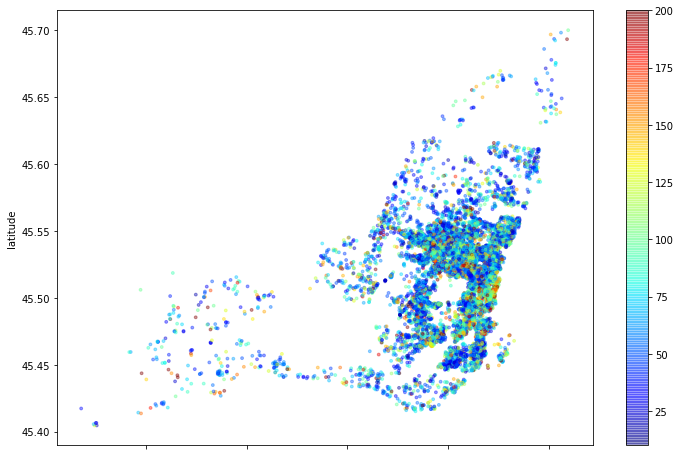

In [220]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))

In [282]:
# The neighborhoods with the biggest number of units
df_clean.neighbourhood.value_counts().head(15)

Le Plateau-Mont-Royal                   4816
Ville-Marie                             4446
Rosemont-La Petite-Patrie               1809
Côte-des-Neiges-Notre-Dame-de-Grâce     1244
Le Sud-Ouest                            1084
Villeray-Saint-Michel-Parc-Extension    1047
Mercier-Hochelaga-Maisonneuve            930
Verdun                                   452
Ahuntsic-Cartierville                    308
Outremont                                215
LaSalle                                  192
Saint-Laurent                            170
Lachine                                  103
Montréal-Nord                             78
Westmount                                 74
Name: neighbourhood, dtype: int64

In [283]:
# The neighborhoods with the lowest number of units
df_clean.neighbourhood.value_counts().tail(15)

Pierrefonds-Roxboro              61
Anjou                            60
Dorval                           54
Côte-Saint-Luc                   46
Mont-Royal                       33
Dollard-des-Ormeaux              32
Beaconsfield                     24
Hampstead                        19
Kirkland                         16
L'Île-Bizard-Sainte-Geneviève    16
Montréal-Ouest                   13
Sainte-Anne-de-Bellevue           5
Montréal-Est                      4
Baie-d'Urfé                       2
Senneville                        1
Name: neighbourhood, dtype: int64

In [249]:
# Looking for the best prices/night for hosts (higher prices)
(df_clean.groupby(['neighbourhood']).price.mean()).sort_values(ascending=False)[:10]

neighbourhood
Baie-d'Urfé                      115.500000
Kirkland                          97.437500
Westmount                         96.162162
Ville-Marie                       91.205578
L'Île-Bizard-Sainte-Geneviève     89.250000
Côte-Saint-Luc                    89.086957
Dollard-des-Ormeaux               86.062500
Beaconsfield                      84.250000
Le Plateau-Mont-Royal             83.160507
Hampstead                         82.368421
Name: price, dtype: float64

In [247]:
# units with the lowest percentages of availability (nobody paying) 
(df_clean.groupby(['neighbourhood']).availability_365.mean() / 365 * 100).sort_values(ascending=True)[:10]

neighbourhood
Sainte-Anne-de-Bellevue                  7.123288
Outremont                               17.866837
Rosemont-La Petite-Patrie               19.632280
Villeray-Saint-Michel-Parc-Extension    20.396698
Le Plateau-Mont-Royal                   21.541494
Westmount                               22.513884
Verdun                                  25.742514
Ahuntsic-Cartierville                   27.581391
Côte-des-Neiges-Notre-Dame-de-Grâce     27.915474
Mercier-Hochelaga-Maisonneuve           29.945500
Name: availability_365, dtype: float64

In [280]:
# Looking for the best prices/night for guests (lower prices)
(df_clean.groupby(['neighbourhood']).price.mean()).sort_values(ascending=True)[:10]

neighbourhood
Senneville                              35.000000
Sainte-Anne-de-Bellevue                 54.000000
Montréal-Nord                           56.961538
Anjou                                   59.266667
Villeray-Saint-Michel-Parc-Extension    68.046800
Montréal-Est                            68.250000
Mercier-Hochelaga-Maisonneuve           69.770968
Mont-Royal                              69.939394
Pierrefonds-Roxboro                     70.524590
Côte-des-Neiges-Notre-Dame-de-Grâce     71.705788
Name: price, dtype: float64

In [246]:
# units with the higher percentages of availability (nobody paying) 
(df_clean.groupby(['neighbourhood']).availability_365.mean() / 365 * 100).sort_values(ascending=False)[:10]

neighbourhood
Dorval                           51.927955
Kirkland                         51.301370
Baie-d'Urfé                      50.821918
Senneville                       49.315068
Montréal-Ouest                   48.113804
Mont-Royal                       47.862183
Beaconsfield                     47.454338
Dollard-des-Ormeaux              45.659247
L'Île-Bizard-Sainte-Geneviève    42.174658
Hampstead                        39.985580
Name: availability_365, dtype: float64

In [0]:
# representativity of the two neighborhoods with more units into Airbnb
df_clean.neighbourhood.value_counts().head(2) / df_clean.shape[0] *100

Le Plateau-Mont-Royal    27.424406
Ville-Marie              25.317465
Name: neighbourhood, dtype: float64

**Q5. Insights**

* Plateau Montreal is a really demanded neighbourhood. Is the neighborhood with the greater number of houses and at the same time is into the top 10 neighbourhoods with better occupancy (only 21% of the days vacants) and best prices (mean of 83 dollars)

* Ville Marie, the second neighbourhood with more places available in the website, and with one of the best prices per night (91 dollars).

* People that lives in Westmount could rent a room or their place for a really good price (63 dollars per night) and the occupancy rate is really high (only 21% of the days the unit would be available). 

* Mont-Royal has 33 disponible units into the website, but it could be a great opportunity for visitors. Placed in the heart of the city, its houses are less expensives and has more options of days since its ocuppancy rate is low (approximatly 47% of the year the room/house is available) 

* Senvile could look like a really good choice for gests also, but the data is from only one unit available. 

###Q6. Are people using Airbnb as it should?

In [0]:
top_hosts = df.host_id.value_counts().head(10)
top_hosts

12243051     143
7152707       70
72761895      67
38459934      60
487327        60
318040        60
111294431     48
224865057     48
73995257      46
387422        46
Name: host_id, dtype: int64

In [230]:
(df.calculated_host_listings_count.value_counts() / df.shape[0] *100).sort_values(ascending=False)[:10]

1     56.327606
2     13.258324
3      5.777710
4      3.588262
5      2.179312
6      1.854949
7      1.773858
60     0.912270
9      0.866657
17     0.861588
Name: calculated_host_listings_count, dtype: float64

In [302]:
# create frame with the hosts that have one add only 
df_id_1 = df_clean.copy()
df_id_1.drop(df_id_1[df_id_1.calculated_host_listings_count != 1].index, axis=0, inplace=True)

# See how many of them share their place
df_id_1.room_type.value_counts()/df_id_1.shape[0] * 100

Entire home/apt    68.545581
Private room       30.708818
Shared room         0.715777
Hotel room          0.029824
Name: room_type, dtype: float64

In [304]:
# create frame with the hosts that have six adds 
df_id_6 = df_clean.copy()
df_id_6.drop(df_id_6[df_id_6.calculated_host_listings_count != 6].index, axis=0, inplace=True)

# it is when the shared room stop being offerd
df_id_6.room_type.value_counts()/df_id_6.shape[0] * 100

Entire home/apt    65.993266
Private room       32.996633
Hotel room          1.010101
Name: room_type, dtype: float64

In [306]:
# create frame with the hosts that have 60 adds 
df_id_60 = df_clean.copy()
df_id_60.drop(df_id_60[df_id_60.calculated_host_listings_count != 60].index, axis=0, inplace=True)

# mooment where only entire places are offered
df_id_60.room_type.value_counts()/df_id_60.shape[0] * 100

Entire home/apt    100.0
Name: room_type, dtype: float64

**Q6. Insights**

* As imagined, people are using Airbnb as a way to profit, renting several entire houses.
* There is one id with more than 140 units
* Even for the ones that has only one add, the most part of units rented are entire apartments. Shared places reprensents 30% of all offers.


##Conclusion

During the exploratory analysis it was possible to point some questions that Airbnb should try to repair. 

* Improving its coverage at Montreal. Maybe it could create new incentives for people that share teir place in different areas.
  * Now a days there are neighbourhoods that are more interesting and less interesting the hosts and guests, maybe there is a way to improve this balance between neighborhoods.
  * Plateau and Ville Marie togheter represents more than 50% of all units avaliable

* Reinforcing the actual goal from the company would be really interesting, otherwise Airbnb is losing its ecollogical value
  * There are more entire units than shared units
  * The platform became an way to make profit